<H2><center><b>Sales Analyst - SQL & Power BI<b\><center\><H2>

<h3><b>Connect MSSQL Server</b></h3>

In [1]:
import pyodbc
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

server = 'PORTS-LIGHT'
database = 'test' 

cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)



<h3><b>Dataset Sample</b></h3>

In [2]:
df = pd.read_sql("SELECT * FROM sales", cnxn)
df.head()

,Invoice_Number,Line_Item_Number,Customer_Number,Invoice_Date,Transaction_Type,Product_Number,Product_Class,Quantity_Sold,Sale_Price,Sales_Tax,Total_Amount
0,18185,1,264629,2016-01-04,IN,052204525,05,34,12.01,28.58,436.92
1,18185,2,264629,2016-01-04,IN,030934423,03,27,7.79,14.72,225.05
2,18185,3,264629,2016-01-04,IN,030302303,03,26,54.95,100.01,1528.71
3,18185,4,264629,2016-01-04,IN,090504761,09,16,12.98,14.54,222.22
4,18185,5,264629,2016-01-04,IN,090010011,09,32,0.99,2.22,33.90


In [3]:
df2 = pd.read_sql("SELECT * FROM customer", cnxn)
df2.head()

,Cust_No,Cust_Name,Street_Address,City,State,Zip_Code,Credit_Limit,Tax_ID,Sales_Rep
0,35189,VERSA TIRES,51001 BORNEO RD,PITTSBURGH,TX,75686,32000,205-11-3654,000120 - Sarah Gamp
1,444413,EQUITABLE CORPORATION,6300 METZEROTT RD,LOUISVILLE,CO,80027,22000,927-95-3640,000230 - Thomas Pinch
2,463451,BLUE ATLANTA,301 E 2ND ST,ST LOUIS,MO,63131,53000,322-56-2428,000350 - Jonas Chuzzlewit
3,269267,UNIVERSITY NATIONAL,9600 MARKET ST,SCARSDALE,NY,10583,22000,425-59-6341,000290 - Seth Pecksniff
4,359310,SECOND BONNET COMMERCIAL,20500 AMERICAN RD,RICHMOND,VA,23219,60000,301-17-8155,000310 - Montague Tigg


<h3><b>SQL</b></h3>

In [6]:
#Sales occurence for each product class  

df = pd.read_sql("""SELECT 
                    Product_Class, 
                    COUNT(Product_Class) as SalesCountPerClass,
                    ROUND(count(Product_Class) * 100.0/ sum(count(Product_Class)) over (), 2) as SalesCountPerClass_Percent
                    FROM sales 
                    GROUP BY Product_Class
                    ORDER BY SalesCountPerClass;
                """, cnxn)
df

,Product_Class,SalesCountPerClass,SalesCountPerClass_Percent
0,18,56,0.62
1,13,107,1.18
2,07,289,3.19
3,05,786,8.67
4,06,957,10.55
5,09,974,10.74
6,04,1042,11.49
7,03,1075,11.85
8,01,1146,12.64
9,02,1190,13.12


In [7]:
# Yearly Sales 2016 & 2017

df = pd.read_sql("""SELECT 
                    DATEPART(yyyy, Invoice_Date) AS [Year], 
                    ROUND(SUM(Total_Amount),2) AS [Sales_Amount]
                    FROM sales
                    GROUP BY DATEPART(yyyy, Invoice_Date)
                """, cnxn)
df

,Year,Sales_Amount
0,2016,5781108.35
1,2017,44537.20


In [8]:
# 2017 sales for each customer

df = pd.read_sql("""SELECT
                    DATEPART(yyyy, Invoice_Date) AS [Year],
                    C.Cust_Name, 
                    SUM(S.Total_Amount) AS [Sales_Amount]
                    FROM customer C LEFT JOIN sales S 
                    ON C.Cust_No = S.Customer_Number
                    GROUP BY DATEPART(yyyy, Invoice_Date), Cust_Name
                    HAVING DATEPART(yyyy, Invoice_Date) = 2017
                """, cnxn)
df

,Year,Cust_Name,Sales_Amount
0,2017,JUSTECH MANAGEMENT,2773.94
1,2017,POLICY FINANCE INC.,29574.06
2,2017,STEPPING ELECTRONICS,12189.20


In [9]:
# Product price segmentation 

df = pd.read_sql("""select 
                    price_range, SUM(Total_Amount) AS Total_Amount, 
                    count(*) * 100.0 / (select count(*) from sales) AS Total_Amount_Percent
                    from
                    (select  *,
                    case
                    when Sale_Price < 50 then '0 - 49'
                    when Sale_Price >= 50 and Sale_Price < 149 then '50 - 149'
                    when Sale_Price >= 150 and Sale_Price < 300 then '150 - 300'
                    when Sale_Price > 300 then '>300'
                    end
                    as price_range
                    from sales) a
                    GROUP BY price_range
                """, cnxn)
df

,price_range,Total_Amount,Total_Amount_Percent
0,>300,887551.79,0.771860
1,0 - 49,2772521.42,87.109935
2,50 - 149,2146475.75,11.963833
3,150 - 300,19096.59,0.154372


<h3><b>Power BI</b></h3>

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

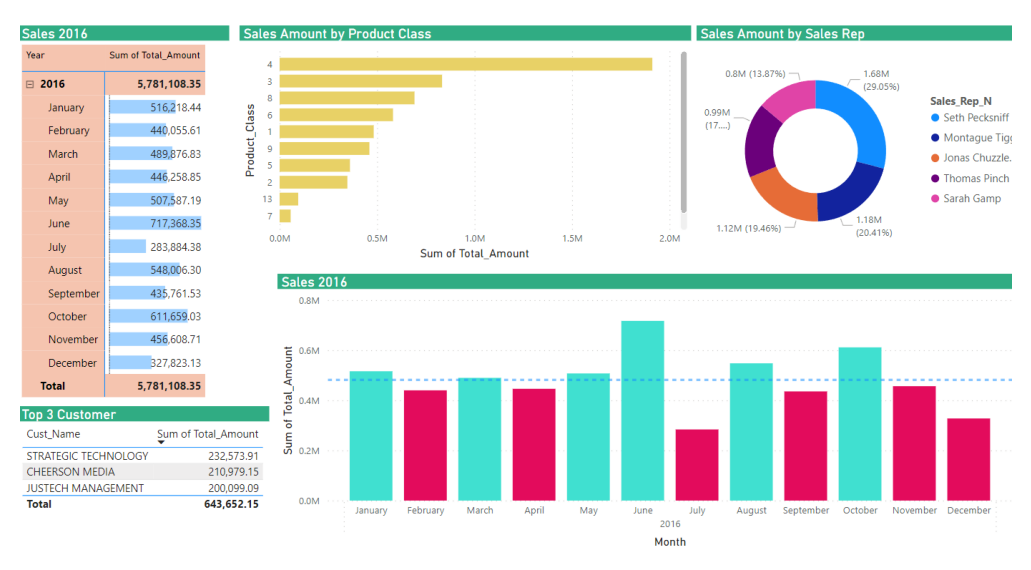

In [11]:
image = Image.open(r"C:\Users\Drive\Desktop\Power BI .png")
plt.figure(dpi=200)
plt.imshow(image)
plt.axis('off')
plt.show()